## **Classification Project - Predict Liver Disease**

In [ ]:

#importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files
# upload=files.upload()

Saving project-data.xlsx to project-data.xlsx


In [ ]:
df=pd.read_excel('project-data.xlsx')

In [ ]:
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [ ]:
df['category'].value_counts()

 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64

## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     615 non-null    object 
dtypes: float64(9), int64(1), object(3)


In [ ]:
#converting the dtype protein to float
df['protein']=df['protein'].apply(pd.to_numeric,errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

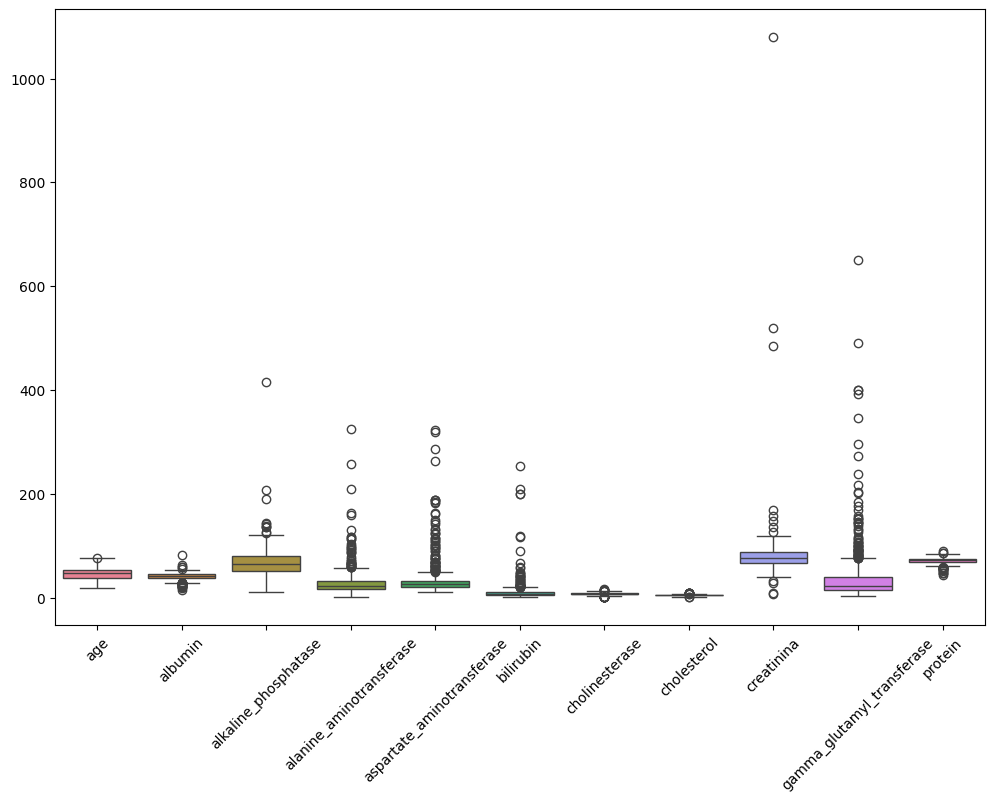

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#finding null values
df.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64

In [ ]:
#treating null values by using their mean
#from sklearn.impute import KNNImputer
#model=KNNImputer(n_neighbors=3)
df['albumin']=df['albumin'].fillna(df.albumin.mean())
df['alkaline_phosphatase']=df['alkaline_phosphatase'].fillna(df.alkaline_phosphatase.mean())
df['alanine_aminotransferase']=df['alanine_aminotransferase'].fillna(df.alanine_aminotransferase.mean())
df['cholesterol']=df['cholesterol'].fillna(df.cholesterol.mean())
df['protein']=df['protein'].fillna(df.protein.mean())

In [ ]:
df.isnull().sum()

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64

In [ ]:
df.shape

(615, 13)

In [ ]:
#checking for duplicated values in data
df[df.duplicated()]

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein


In [ ]:
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


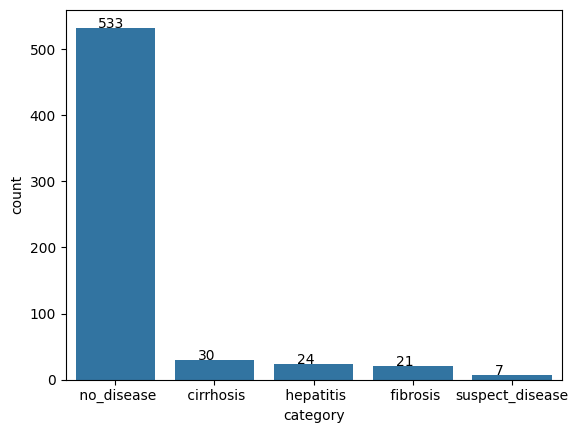

In [ ]:
#visualizing the category column
#plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['category'],data=df,order=df['category'].value_counts().index)
for p,label in zip(ax.patches,df['category'].value_counts()):
  ax.annotate(label,(p.get_x()+0.23,p.get_height()))

from the above plot we can see that total 533 patient are with **no disease**,30 patient are with **cirrhosis**,24 patient are with **hepatitis**,21 patient are with **fibrosis** and 7 patient are with **suspect disease**

In [ ]:
df['sex'].value_counts()

m    377
f    238
Name: sex, dtype: int64

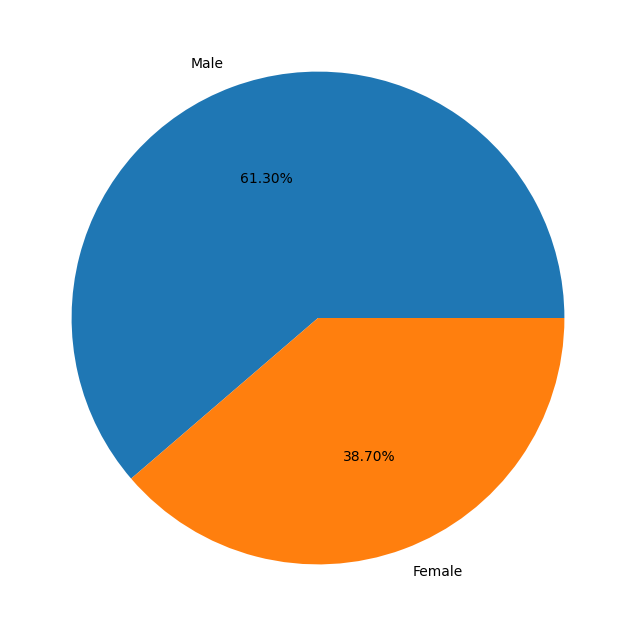

In [ ]:
label=["Male",'Female']
plt.figure(figsize=(8,8))
plt.pie(df.sex.value_counts(),labels=label,autopct="%1.2f%%")
plt.show()

from the above pie chat we can see that,61.30% of **Male patients** and 38.70% of **female patients** are present in the given data

In [ ]:
male_age=df[(df['age'])&(df['sex']=='m')]

<Axes: xlabel='age', ylabel='Count'>

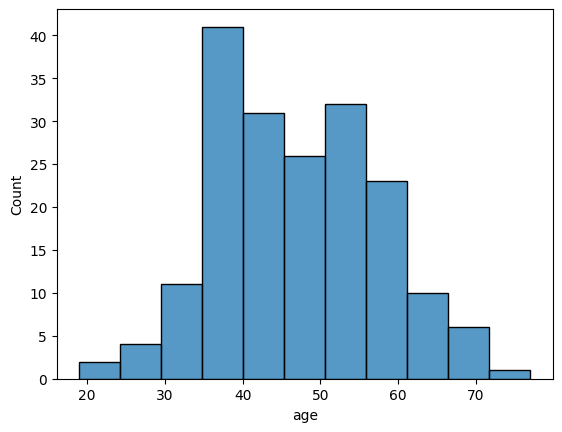

In [ ]:
#visualing male patients age using histogram
#plt.figure(figsize=(10,6))
sns.histplot(x=male_age['age'],data=male_age)

the above histogram states that **male patients** from age 35 to 40 are the majorities and  from 72 to 78 are minorities

In [ ]:
fmale_age=df[(df['age'])&(df['sex']=='f')]

<Axes: xlabel='age', ylabel='Count'>

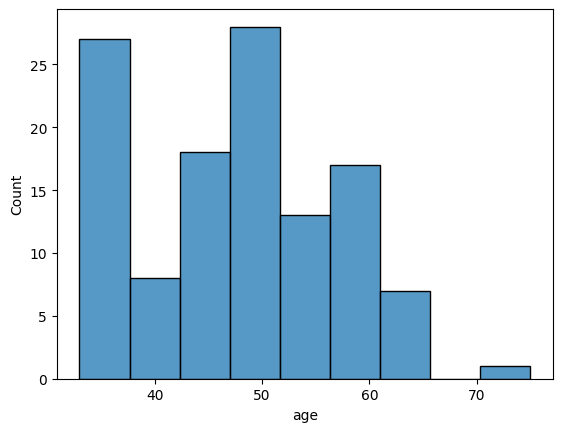

In [ ]:
#visualing female patients age using histogram
sns.histplot(x=fmale_age['age'],data=fmale_age)

the above histogram states that **female patients** from age 48 to 42 are the majorities and from 70 to 73 are minorities

<ipython-input-23-03e2d905910b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


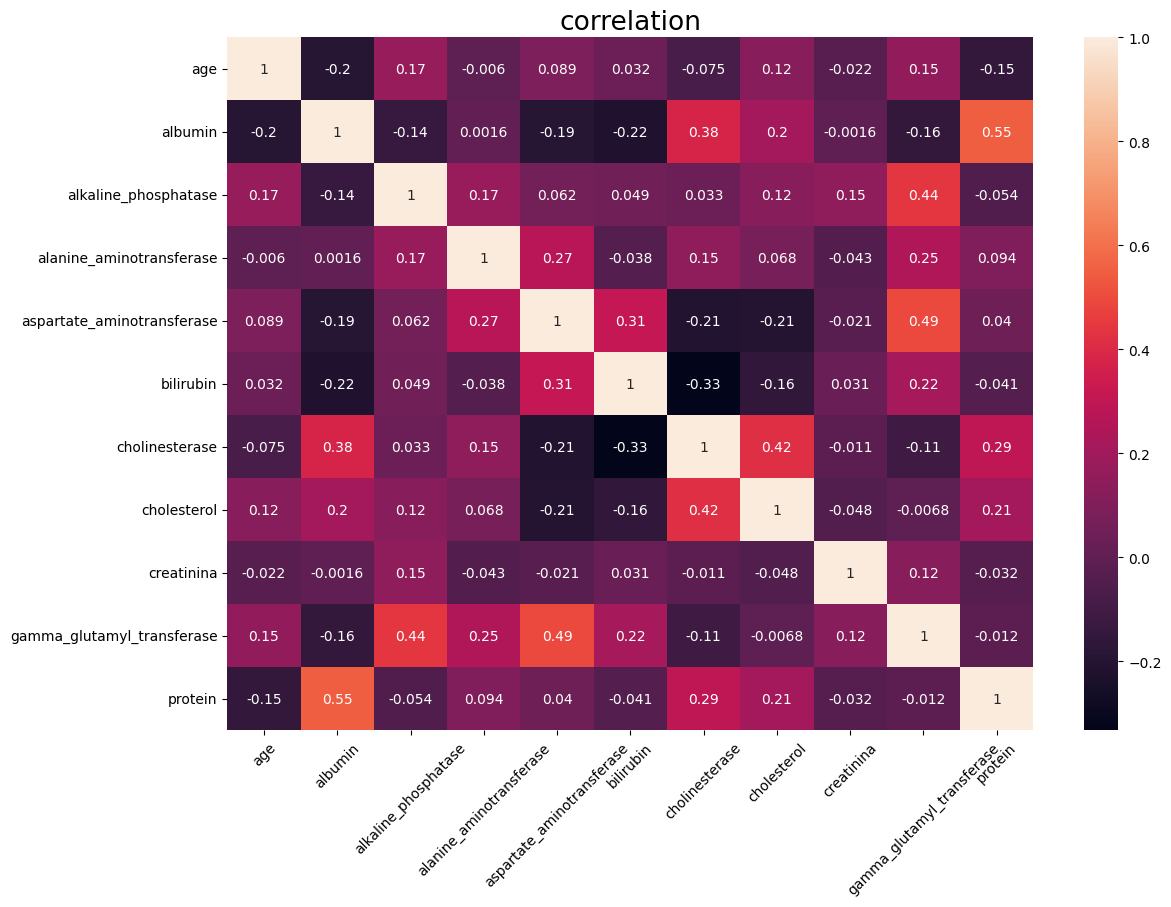

In [ ]:
#checking the corelation between each columns using heatmap
fig=plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),annot=True);
plt.xticks(rotation=45)
plt.title('correlation',fontsize=19);

the correlation between **albumin** and **protein**(0.55) is high and the correlation between **bilirubin** and **cholinesterase**(-0.33) is low compared to others

<Axes: xlabel='category', ylabel='count'>

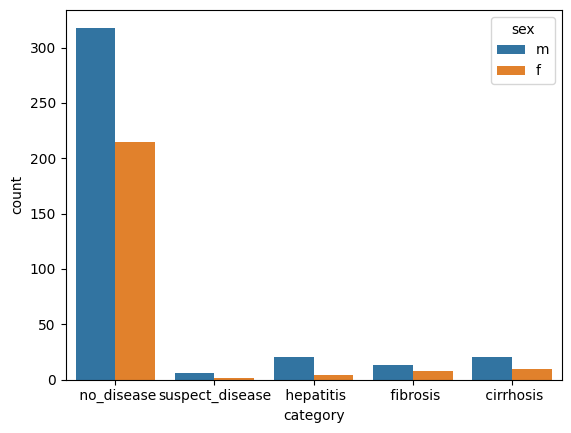

In [ ]:
#using countplot to find which patients are more in between male or female in each category
sns.countplot(x='category',hue='sex',data=df)

the above countplot states that,**male patients** are high compared to **female patients** in each category

<Figure size 1300x800 with 0 Axes>

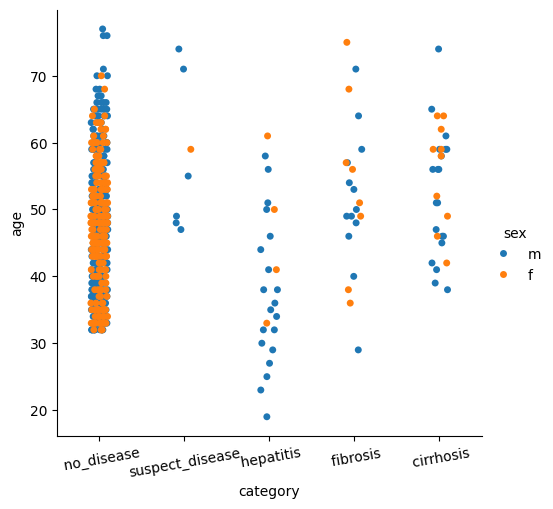

In [ ]:
fig=plt.figure(figsize=(13,8))
sns.catplot(data=df,x='category',y='age',hue='sex');
plt.xticks(rotation=10)
#plt.title('cattagoricalplot',fontsize=19);
plt.show()

the above plot shows that,accoring to thier age how the **male** and **female** patients are get infected to perticular disease

In [ ]:
data1=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['sex'] = le.fit_transform(data1['sex'])

In [ ]:
data1['category'] = le.fit_transform(data1['category'])

In [ ]:
import pickle

In [ ]:
pickle.

In [ ]:
pickle.dump(le,open('label_project3.sav','wb'))

In [ ]:
data1

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,0,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,0,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
def treat_outliers(data,columns):
  outlier=pd.DataFrame()
  for column in columns:
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    col_outliers=data[(data[column]< lower_bound) | (data[column] >upper_bound)]
    outlier=pd.concat([outlier,col_outliers])
    median=data[column].median()
    data[column]=data[column].apply(lambda x: median if x < lower_bound or x >upper_bound else x)
  return data,outlier


In [ ]:
coulmns=[ 'age', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase',
       'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein']

In [ ]:
df_treated,outlier=treat_outliers(data1,coulmns)

In [ ]:
df_treated

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,32.0,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,3,32.0,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32.0,1,46.9,74.70000,36.2,25.9,6.1,8.84,5.20,86.0,33.2,79.3
3,3,32.0,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,3,32.0,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,62.0,0,32.0,66.70000,5.9,25.9,7.3,5.57,6.30,55.7,23.3,68.5
611,0,64.0,0,41.9,102.80000,2.9,44.4,20.0,8.26,3.02,63.0,35.9,71.3
612,0,64.0,0,41.9,87.30000,3.5,25.9,7.3,8.26,3.63,66.7,64.2,82.0
613,0,46.0,0,33.0,68.28392,39.0,25.9,20.0,3.56,4.20,52.0,50.0,71.0


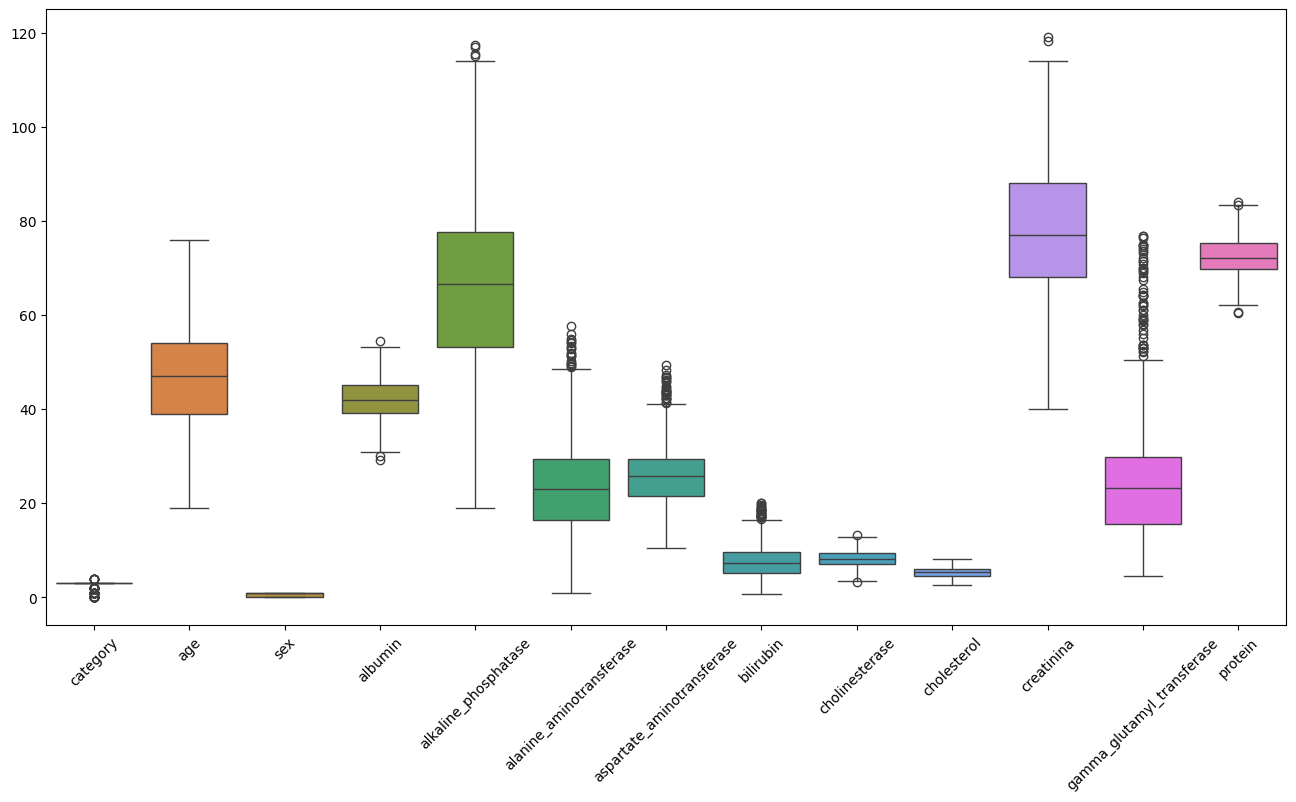

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(df_treated)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df1= df_treated.copy()


In [ ]:
x=df1.drop("category",axis=1)

In [ ]:
y=df1['category']

In [ ]:
y

0      3
1      3
2      3
3      3
4      3
      ..
610    0
611    0
612    0
613    0
614    0
Name: category, Length: 615, dtype: int64

## BALANCING THE DATA

In [ ]:
#randomover sampler is used to resample data in same proportion
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
re_x,re_y=ros.fit_resample(x,y)

In [ ]:
re_x

,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,32.0,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32.0,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32.0,1,46.9,74.7,36.2,25.9,6.1,8.84,5.20,86.0,33.2,79.3
3,32.0,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32.0,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2660,49.0,1,41.9,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,72.2
2661,49.0,1,41.9,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,72.2
2662,71.0,1,41.9,69.8,19.7,25.9,9.8,13.30,2.61,77.0,7.6,72.2
2663,71.0,1,41.9,69.8,19.7,25.9,9.8,13.30,2.61,77.0,7.6,72.2


In [ ]:
df['category'].value_counts()

 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64

In [ ]:
re_y.value_counts()

3    533
4    533
2    533
1    533
0    533
Name: category, dtype: int64

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.8 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# feature extraction
DTC= DecisionTreeClassifier()
DTC.fit(re_x, re_y)
importance =DTC.feature_importances_
importance

array([0.10424155, 0.        , 0.01600205, 0.18303109, 0.09161315,
       0.11993324, 0.16854687, 0.15144107, 0.00509961, 0.00461166,
       0.08599715, 0.06948256])

In [ ]:
name=[ 'age','sex','albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase',
       'bilirubin', 'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein']

In [ ]:
scores = pd.Series(data=importance, index=name)
scores

age                           0.104242
sex                           0.000000
albumin                       0.016002
alkaline_phosphatase          0.183031
alanine_aminotransferase      0.091613
aspartate_aminotransferase    0.119933
bilirubin                     0.168547
cholinesterase                0.151441
cholesterol                   0.005100
creatinina                    0.004612
gamma_glutamyl_transferase    0.085997
protein                       0.069483
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(re_x,re_y,test_size=0.20,random_state=50)

Logestic regression

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
log_acc=accuracy_score(log_pred,y_test)
print("Test accuracy: {:.2f}%".format(log_acc*100))

Test accuracy: 74.30%


In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_pred=mnb.predict(x_test)
mnb_acc=accuracy_score(mnb_pred,y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 60.23%


In [ ]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
rfc_acc=accuracy_score(rfc_pred,y_test)
print("Test accuracy: {:.2f}%".format(rfc_acc*100))

Test accuracy: 99.81%


In [ ]:
svc=LinearSVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 56.47%


In [ ]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
dtc_acc=accuracy_score(dtc_pred,y_test)
print("Test accuracy: {:.2f}%".format(dtc_acc*100))

Test accuracy: 75.05%


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00       111
           3       1.00      0.99      1.00       118
           4       0.99      1.00      1.00       111

    accuracy                           1.00       533
   macro avg       1.00      1.00      1.00       533
weighted avg       1.00      1.00      1.00       533



In [ ]:
classs = {"logistic_Regression": ' 74.30%',"random_forest":'99.8%',"svc":'56.47%',"decision_tree":'75.05%','Naive_bayes':'60.23%'}

In [ ]:
import pandas as pd

In [ ]:
Accuracy = pd.DataFrame({'Models':classs.keys(),'Accuracy':classs.values()})

In [ ]:
Accuracy

,Models,Accuracy
0,logistic_Regression,74.30%
1,random_forest,99.8%
2,svc,56.47%
3,decision_tree,75.05%
4,Naive_bayes,60.23%


**AUTOML METHOD**

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=35d9623d16b754a8431406194d31310066f40e7eb00eb8d5a41f06fece2a8e3c
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3y_nvlry
  JVM stdout: /tmp/tmp3y_nvlry/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3y_nvlry/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_unknownUser_6anljk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df_train,df_test=train_test_split(df1,test_size=0.2,random_state=12)

In [ ]:
h2o_frame= h2o.H2OFrame(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_frame

category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
3,32,1,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70,16.9,74.5
3,56,1,45.7,45.3,19.5,27,9.3,10.62,6.04,94,17.4,74.5
3,64,1,46,75.9,34.8,30.6,10.8,9.43,6.69,81,53.7,70.7
3,49,1,41.2,96,25,27.7,15.6,7.12,5.61,92,37.8,68.7
3,45,0,37.5,54.3,12.9,14.8,5.9,6.95,5.29,66,49.4,70.1
3,41,1,46.9,69,19.7,27.3,6.1,6.39,4.55,72,21.6,71.3
3,46,1,37.9,79.9,17.7,20.1,12.7,10.1,5.38,72,12.7,67.7
3,34,0,36.2,70.9,14.3,21.6,3.7,9.82,5.59,65,27.4,74.3
3,37,1,43.6,72.8,51.4,43.7,13.8,8.16,4.88,70,23.3,75.2
3,45,0,46.4,49.1,14.9,25.5,11,8.77,2.86,94,12,77.1


In [ ]:
x=h2o_frame.columns

In [ ]:
x

['category',
 'age',
 'sex',
 'albumin',
 'alkaline_phosphatase',
 'alanine_aminotransferase',
 'aspartate_aminotransferase',
 'bilirubin',
 'cholinesterase',
 'cholesterol',
 'creatinina',
 'gamma_glutamyl_transferase',
 'protein']

In [ ]:
y='category'

In [ ]:
y

'category'

In [ ]:
x.remove(y)

In [ ]:
x

['age',
 'sex',
 'albumin',
 'alkaline_phosphatase',
 'alanine_aminotransferase',
 'aspartate_aminotransferase',
 'bilirubin',
 'cholinesterase',
 'cholesterol',
 'creatinina',
 'gamma_glutamyl_transferase',
 'protein']

In [ ]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=666)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GBM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_4_AutoML_1_20240119_93138,0.137408,0.370686,0.208899,0.1634,0.137408,276,0.051008,StackedEnsemble
GBM_grid_1_AutoML_1_20240119_93138_model_7,0.145143,0.380976,0.201758,0.170979,0.145143,299,0.031084,GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20240119_93138,0.148151,0.384904,0.206888,0.169181,0.148151,156,0.05637,StackedEnsemble
XGBoost_grid_1_AutoML_1_20240119_93138_model_2,0.148408,0.385238,0.224773,0.172638,0.148408,932,0.01071,XGBoost
GBM_grid_1_AutoML_1_20240119_93138_model_4,0.148437,0.385275,0.214404,0.173158,0.148437,265,0.036269,GBM
StackedEnsemble_AllModels_3_AutoML_1_20240119_93138,0.148611,0.385501,0.201356,0.177718,0.148611,941,0.244826,StackedEnsemble
GBM_grid_1_AutoML_1_20240119_93138_model_28,0.148904,0.385881,0.218335,0.174734,0.148904,247,0.059992,GBM
StackedEnsemble_AllModels_4_AutoML_1_20240119_93138,0.149236,0.386311,0.199412,0.177981,0.149236,483,0.230711,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240119_93138,0.149485,0.386633,0.210674,0.168245,0.149485,240,0.038504,StackedEnsemble
GBM_grid_1_AutoML_1_20240119_93138_model_51,0.149771,0.387003,0.220714,0.174454,0.149771,200,0.029794,GBM


In [ ]:
from h2o.model.regression import h2o_mean_squared_error

h2o_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_test

category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
3,33,1,46.4,68.2,10.3,20,5.7,7.36,4.3,79,18.7,68.6
3,50,1,42.2,66.7,27.5,37.9,4.5,8.26,5.31,103,23.3,73.1
3,52,1,41.9,82.2,37,23.7,7.8,8.9,6.09,77,23.3,67.4
3,61,1,45.9,73.3,17.1,24.3,4.8,10.01,4.95,88,23.5,70.8
3,41,1,42.3,55.9,19.6,18.9,10.9,7.15,3.29,86,24.5,76.1
3,66,1,40.6,79.6,27,28,10.1,10.88,5.48,76,29.8,71.8
3,53,1,49.2,71.8,42.8,29.4,6.8,8.26,6.24,107,48.3,77.8
3,33,0,44.3,74,49.7,25.9,8.5,6.49,3.34,73,44.7,73.8
3,42,0,43.4,54,11.3,21.3,1.8,6.43,4.43,54,18.6,82.3
3,37,1,41.5,64.6,23.7,29.9,9.3,5.49,3.97,100,10.4,69.3


In [ ]:
h2o_testx=h2o_test[1:]
h2o_testx

age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
33,1,46.4,68.2,10.3,20,5.7,7.36,4.3,79,18.7,68.6
50,1,42.2,66.7,27.5,37.9,4.5,8.26,5.31,103,23.3,73.1
52,1,41.9,82.2,37,23.7,7.8,8.9,6.09,77,23.3,67.4
61,1,45.9,73.3,17.1,24.3,4.8,10.01,4.95,88,23.5,70.8
41,1,42.3,55.9,19.6,18.9,10.9,7.15,3.29,86,24.5,76.1
66,1,40.6,79.6,27,28,10.1,10.88,5.48,76,29.8,71.8
53,1,49.2,71.8,42.8,29.4,6.8,8.26,6.24,107,48.3,77.8
33,0,44.3,74,49.7,25.9,8.5,6.49,3.34,73,44.7,73.8
42,0,43.4,54,11.3,21.3,1.8,6.43,4.43,54,18.6,82.3
37,1,41.5,64.6,23.7,29.9,9.3,5.49,3.97,100,10.4,69.3


In [ ]:
y_pred = h2o_automl.predict(h2o_testx)
y_actual = h2o.H2OFrame(df_test[['category']])

h2o_mean_squared_error(y_actual, y_pred)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.19321753338603695

In [ ]:
from keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
model1=Sequential()
model1.add(Dense(60,input_dim=12,kernel_initializer='random_normal', activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal', activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal', activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60)                780       
                                                                 
 dense_13 (Dense)            (None, 8)                 488       
                                                                 
 dense_14 (Dense)            (None, 10)                90        
                                                                 
Total params: 1358 (5.30 KB)
Trainable params: 1358 (5.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=10)

In [ ]:
m_pred=model.predict(x_test)

17/17 [==============================] - 0s 2ms/step


In [ ]:
model.evaluate(x_test,y_test)

17/17 [==============================] - 0s 2ms/step - loss: -1461490688.0000 - accuracy: 0.1689


[-1461490688.0, 0.16885553300380707]

In [ ]:
new={'age':32,'sex':1,'albumin':38.5,'alkaline_phosphatase':52.50000,'alanine_aminotransferase':7.7,'aspartate_aminotransferase':22.1,'bilirubin':7.5,'cholinesterase':6.93,'cholesterol':3.23,'creatinina':106,'gamma_glutamyl_transferase':12.1,'protein':69}

In [ ]:
new_value=pd.DataFrame(v)

In [ ]:
new_value

,0
0,32.00
1,1.00
2,3.23
3,69.00
4,38.50
5,7.70
6,7.50
7,6.93
8,106.00
9,12.10


In [ ]:
import pickle

In [ ]:
filename='randomforest_model.sav'
pickle.dump(rfc,open(filename,'wb'))

In [ ]:
m=pickle.load(open('randomforest_model.sav','rb'))

In [ ]:
mm=[[32.0,1	,38.5,	52.5,	7.7,	22.1,	7.5,	6.93,	3.23,	106.0,	12.1,69.0]]

In [ ]:
k=m.predict(mm)

In [ ]:
le.inverse_transform(k)

array([' no_disease'], dtype=object)